In [1]:
import numpy as np
import random as rn
import pandas as pd
import seaborn as sns

In [2]:
titanic = pd.read_csv(r"titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


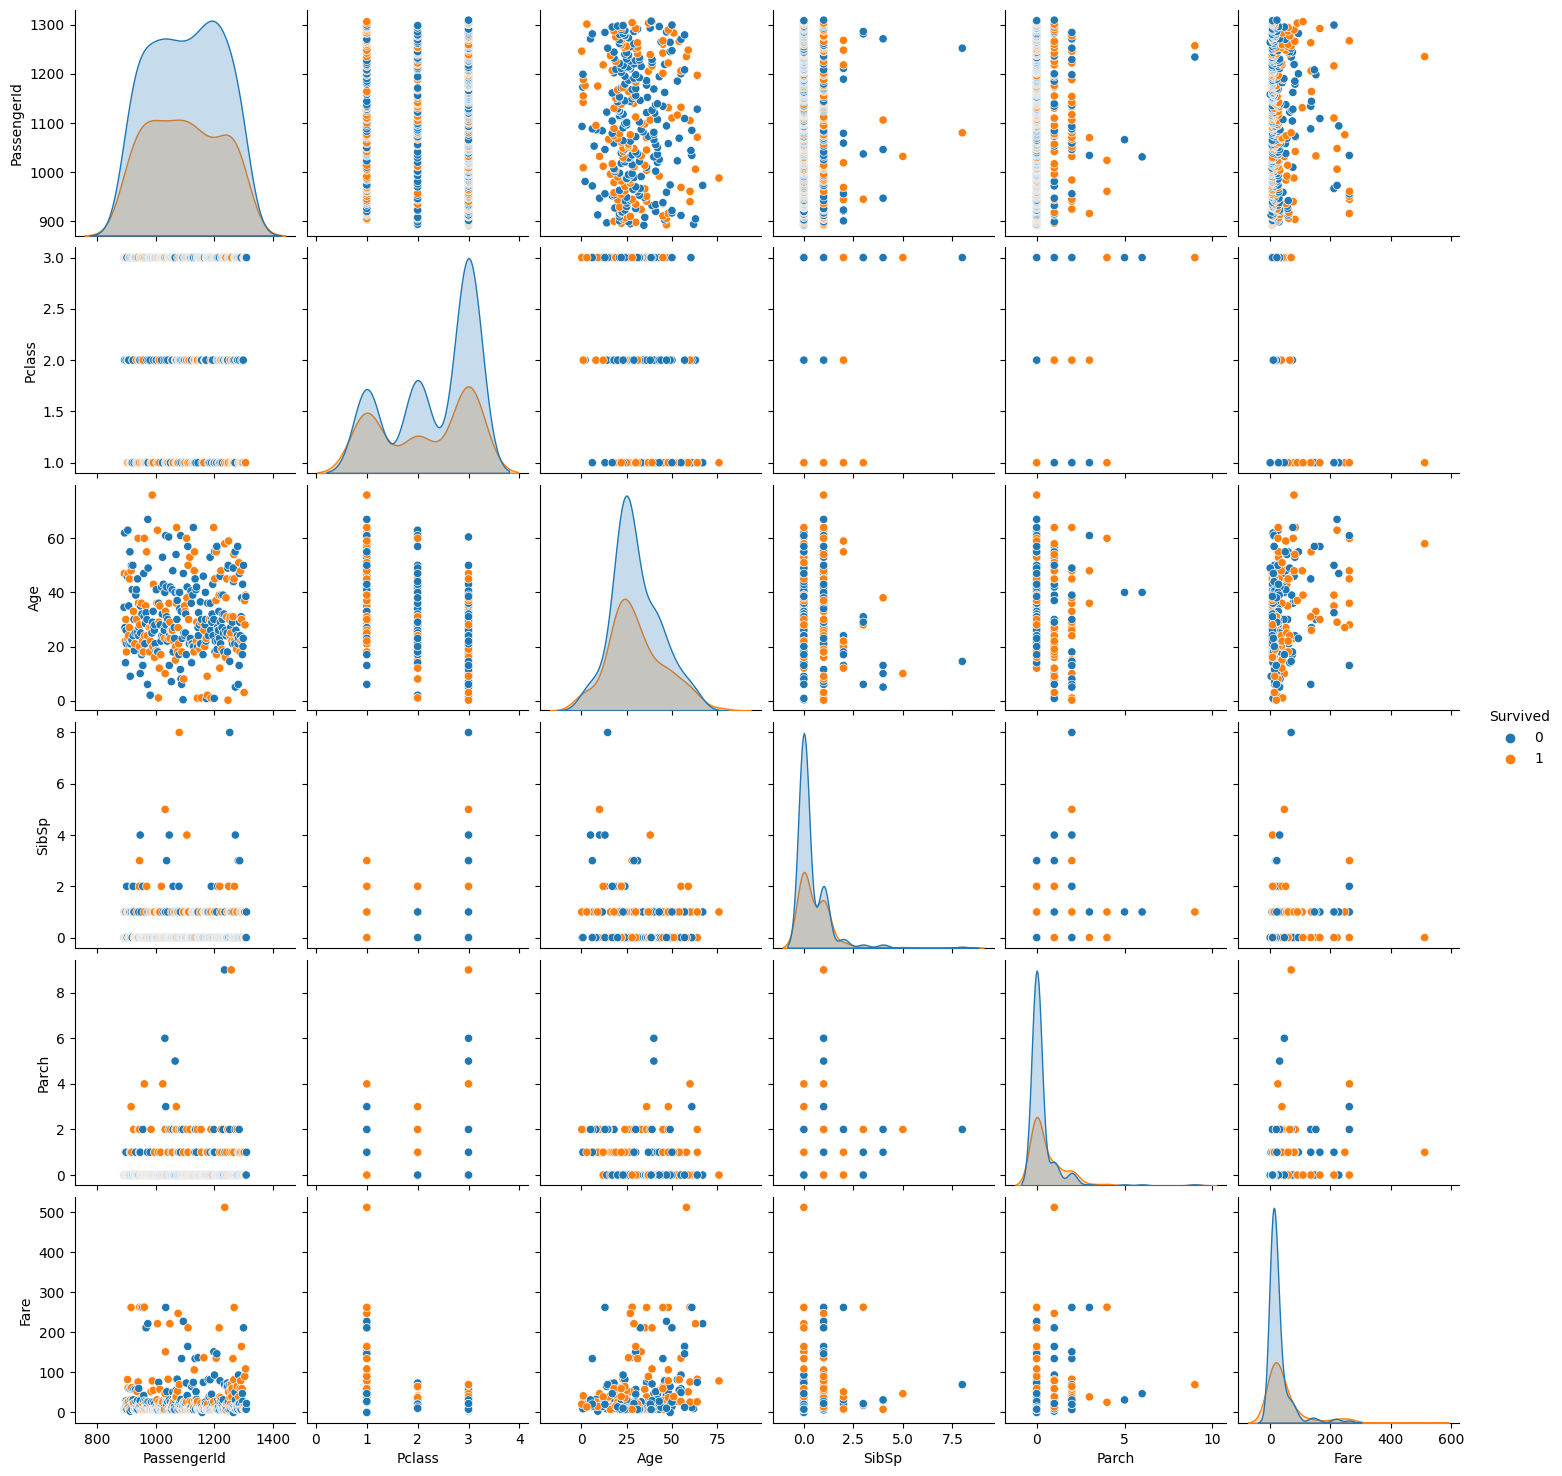

In [5]:
sns.pairplot(titanic, hue="Survived")

In [6]:
class DataProcessing:
    @staticmethod
    def shuffle(x):
        for i in range(len(x)-1,0,-1):
            j=rn.randint(0,i-1)
            x.iloc[j], x.iloc[i] = x.iloc[i], x.iloc[j]
            
    @staticmethod
    def normalization(x):
        values=x.select_dtypes(exclude="object")
        columnNames=values.columns.tolist()
        for column in columnNames:
            data = x.loc[:,column]
            max1=max(data)
            min1=min(data)
            for row in range(0,len(x),1):
                xprim=(x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim 
                
    @staticmethod
    def split(x,k):
        return x[:int(len(x)*k//1)], x[int(len(x)*k//1 +1):]

In [8]:
DataProcessing.shuffle(titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
1,1015,0,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,NaN,S
2,924,1,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0,1,2,C.A. 2315,20.5750,NaN,S
3,978,1,3,"Barry, Miss. Julia",female,27.0,0,0,330844,7.8792,NaN,Q
4,1086,0,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S


In [9]:
trainingSet, validatingSet = DataProcessing.split(titanic,0.7)